## Handwritten digit classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the handwritten digit dataset

In [3]:
from keras.datasets import mnist

In [4]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
ytrain[0]

5

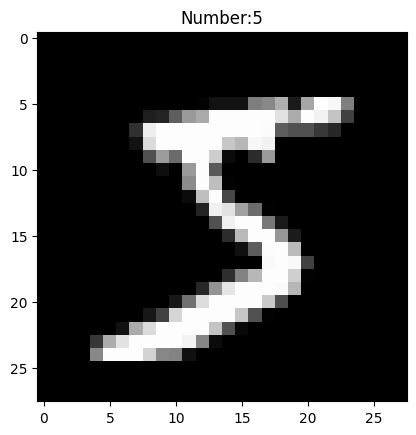

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.title(f'Number:{ytrain[0]}')
plt.show()

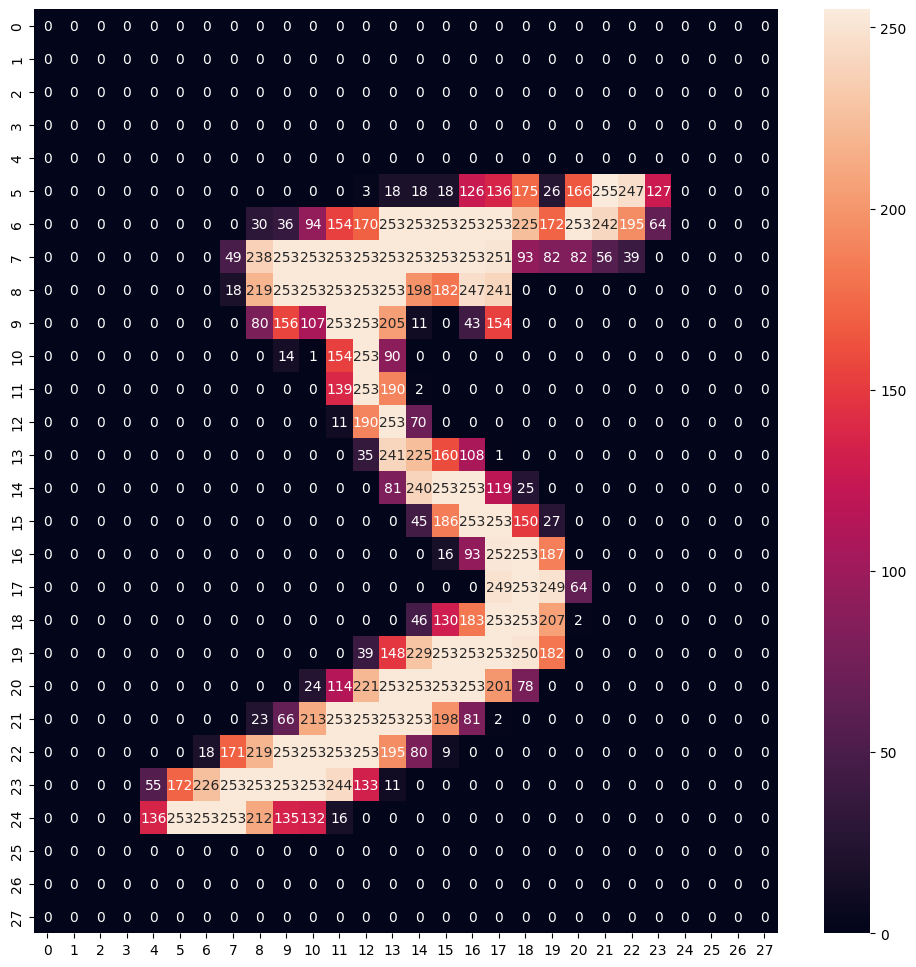

In [10]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

### Seeing top 9 results from xtrain

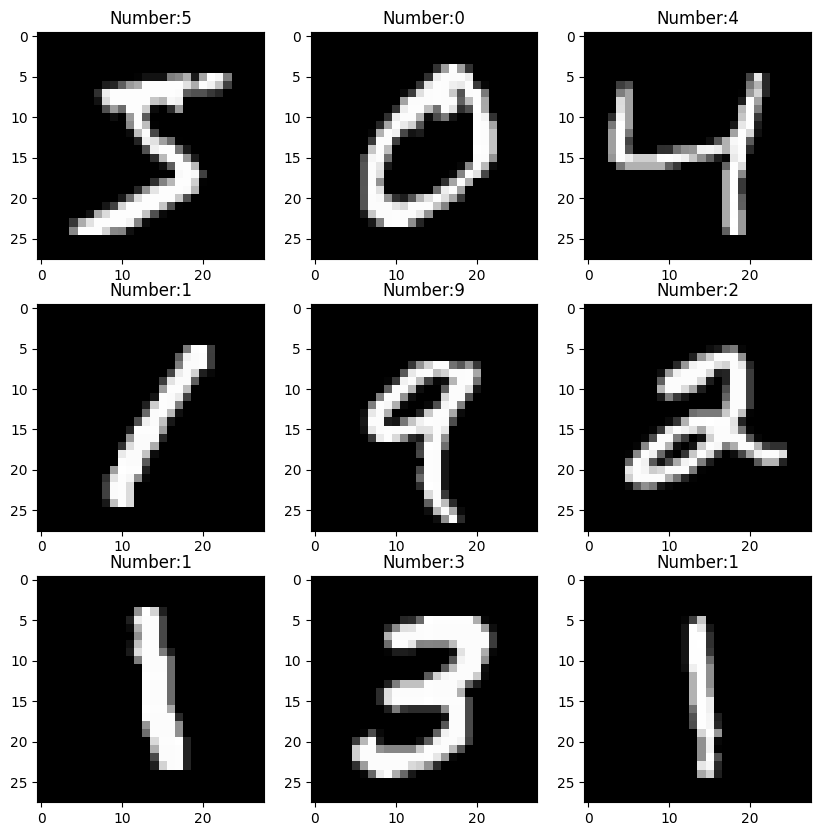

In [11]:
plt.figure(figsize=(10,10))
x=1
for i in range(9):
    plt.subplot(3,3,x)
    x=x+1
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Number:{ytrain[i]}')
plt.show()    

### Preprocessing images

In [12]:
xtrain_scl=xtrain/255
xtest_scl=xtest/255

In [14]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert ytrain and ytest to categorical

In [15]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [16]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Building the CNN
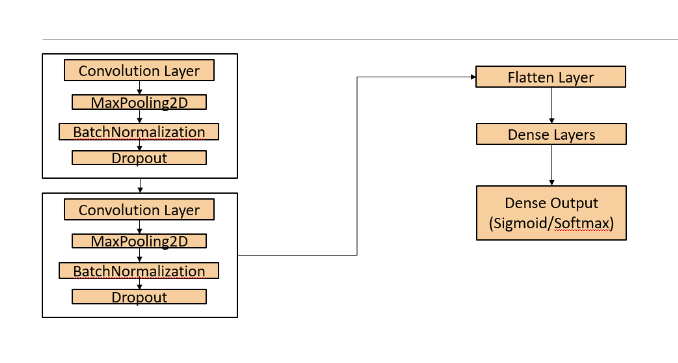

### Batch Normalization Layer will act like standard scalar to each image

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense

In [19]:
model=Sequential()

# Create Convolution Layer 1
model.add(Convolution2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create Convolution Layer 2
model.add(Convolution2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create a flatten layer
model.add(Flatten())

# Create a dense layer
model.add(Dense(256,activation='relu'))

# Create an output layer
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

### Compile the model

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Fit the Model

In [22]:
hist=model.fit(xtrain_scl,ytrain_cat,validation_split=0.2,epochs=5)

Epoch 1/5


1500/1500 [==============================] - 10s 6ms/step - loss: 0.1364 - accuracy: 0.9576 - val_loss: 0.0597 - val_accuracy: 0.9822
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0484 - val_accuracy: 0.9869
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0407 - val_accuracy: 0.9898


### Plot the learning curve

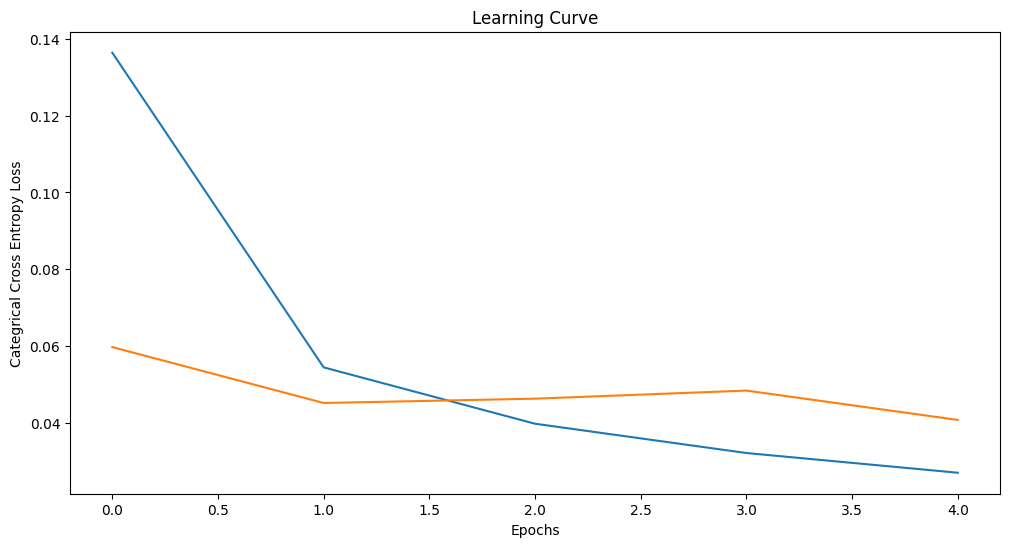

In [24]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categrical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model in train and test

In [26]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0177 - accuracy: 0.9948


[0.017676927149295807, 0.9947500228881836]

In [27]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9887


[0.036820776760578156, 0.9886999726295471]

### Predicting the results for train and test

In [28]:
yprob_tr=model.predict(xtrain_scl)
yprob_ts=model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [29]:
yprob_tr[0:5]

array([[3.1669142e-12, 9.5346175e-11, 1.7712548e-11, 1.8651970e-04,
        1.0152877e-14, 9.9981350e-01, 8.1667624e-09, 6.1497745e-09,
        2.0652877e-08, 1.5664712e-09],
       [1.0000000e+00, 4.7578589e-14, 2.6122424e-11, 4.7718080e-15,
        1.8023786e-12, 4.5636041e-14, 1.8930224e-10, 4.0230121e-11,
        9.9627450e-12, 2.3152270e-12],
       [4.3621281e-16, 2.1208914e-10, 5.6408840e-07, 1.7858375e-13,
        9.9999905e-01, 3.7595917e-13, 5.9007572e-15, 4.1106794e-08,
        4.7318247e-11, 3.2155600e-07],
       [1.1422832e-05, 9.9993956e-01, 1.5799220e-07, 5.0648682e-12,
        2.8572184e-05, 4.1272367e-07, 1.6839092e-05, 1.0058540e-06,
        2.0515799e-06, 1.4925769e-07],
       [4.1022925e-11, 7.3014972e-09, 3.0412377e-06, 2.5421846e-07,
        1.1566608e-06, 1.8401035e-07, 9.3266740e-12, 2.1879503e-05,
        7.3393290e-05, 9.9989998e-01]], dtype=float32)

### Predicting Numbers

In [30]:
ypred_tr=np.argmax(yprob_tr,axis=1)
ypred_ts=np.argmax(yprob_ts,axis=1)

In [31]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [32]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [35]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a confusion matrix

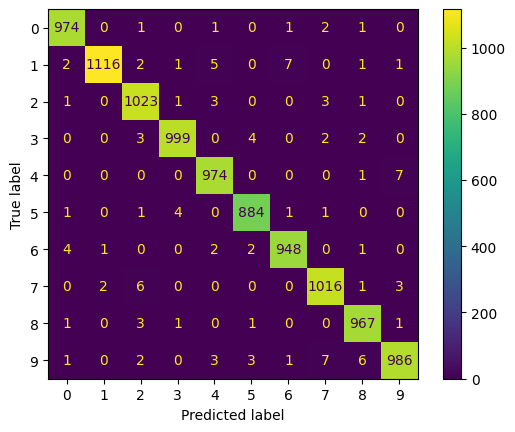

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
model.save('HandwrittenModel.keras')

In [39]:
from keras.models import load_model

In [40]:
nn=load_model('HandwrittenModel.keras')

In [41]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0